In [1]:
from google.colab import files
uploaded=files.upload()

Saving sampledtesting2.csv to sampledtesting2.csv
Saving sampledtraining2.csv to sampledtraining2.csv


In [2]:
import io
import pandas as pd
training=pd.read_csv(io.BytesIO(uploaded['sampledtraining2.csv']))
testing=pd.read_csv(io.BytesIO(uploaded['sampledtesting2.csv']))

In [3]:
training.head()

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,2611,-0.839783,0,0,2.0,0.0,0.436870,1,1,1,0.987657,0
1,5368,-1.125050,0,1,3.0,0.0,-0.101940,1,0,0,-1.445631,1
2,14513,1.034827,2,1,2.0,1.0,0.427989,1,1,0,0.443701,1
3,8904,0.352225,1,0,1.0,0.0,0.225041,1,1,1,0.279804,1
4,1021,-1.665020,1,0,1.0,1.0,0.342498,2,1,1,1.623358,0


In [4]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 35.7 MB/s 


In [6]:

import keras_tuner

In [7]:
import scikitplot as skplt
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [9]:
from sklearn.model_selection import train_test_split


In [ ]:

def my_l1(weights):
    return tf.reduce_sum(tf.abs(0.01*weights))
class hypermodel3(keras_tuner.HyperModel):
    def build(self,hp):
        model=keras.Sequential(
      [tf.keras.layers.Dense(units=hp.Int(f"units_1", min_value=28, max_value=56, step=4),
                                          activation=hp.Choice(f"activation_1", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_2", min_value=24, max_value=52,step=4),activation=hp.Choice(f"activation_2", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Dense(units=hp.Int(f"units_3", min_value=16, max_value=44,step=4),activation=hp.Choice(f"activation_3", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_4", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_4", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Dense(units=hp.Int(f"units_5", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_5", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_6", min_value=24, max_value=52,step=4),activation=hp.Choice(f"activation_6", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_7", min_value=28, max_value=56, step=4),activation=hp.Choice(f"activation_7", ["relu", "tanh"]),
                                                                                                                  ),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(1,activation='sigmoid')])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse",metrics =["accuracy"])
        return model
    def fit(self,hp,model,x,y,*args,**kwargs):
        return model.fit(x,y,**kwargs)
    def predict(self,hp,model,x,**kwargs):
        return model.predict(x,**kwargs)

In [ ]:

class hypermodel3L(keras_tuner.HyperModel):
    def build(self,hp):
        model=keras.Sequential(
      [tf.keras.layers.Dense(units=hp.Int(f"units_1", min_value=28, max_value=56, step=4),
                                          activation=hp.Choice(f"activation_1", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(hp.Float("dropout1",.01,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_2", min_value=24, max_value=52,step=4),activation=hp.Choice(f"activation_2", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Dense(units=hp.Int(f"units_3", min_value=16, max_value=44,step=4),activation=hp.Choice(f"activation_3", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_4", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_4", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Dense(units=hp.Int(f"units_5", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_5", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_6", min_value=24, max_value=52,step=4),activation=hp.Choice(f"activation_6", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_7", min_value=28, max_value=56, step=4),activation=hp.Choice(f"activation_7", ["relu", "tanh"]),
                                                                                                                  kernel_regularizer=my_l1),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(1,activation='sigmoid')])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse",metrics =["accuracy"])
        return model
    def fit(self,hp,model,x,y,*args,**kwargs):
        return model.fit(x,y,**kwargs)
    def predict(self,hp,model,x,**kwargs):
        return model.predict(x,**kwargs)

In [10]:
import time
from collections import deque
# list like container with fast appens and pops on either end 
class hypermodel3Ltwo(keras_tuner.HyperModel):
    def build(self,hp):
        model=keras.Sequential(
      [tf.keras.layers.Dense(units=hp.Int(f"units_1", min_value=18, max_value=46, step=4),
                                          activation=hp.Choice(f"activation_1", ["relu", "tanh"])),
       #tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(rate=hp.Float("dropout1", 0.0,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_2", min_value=14, max_value=42,step=4),activation=hp.Choice(f"activation_2", ["relu", "tanh"])),
       #tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(rate=hp.Float("dropout2", 0.0,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_3", min_value=16, max_value=44,step=4),activation=hp.Choice(f"activation_3", ["relu", "tanh"])),
       #tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(units=hp.Float("dropout2", .01,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_4", min_value=2, max_value=10, step=4),activation=hp.Choice(f"activation_4", ["relu", "tanh"])),
      # tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(rate=hp.Float("dropout4", 0.0,.02,.002)),
        #tf.keras.layers.Dense(units=hp.Int(f"units_5", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_5", ["relu", "tanh"])),
       #tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_6", min_value=14, max_value=32,step=4),activation=hp.Choice(f"activation_6", ["relu", "tanh"])),
       #tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_7", min_value=18, max_value=36, step=4),activation=hp.Choice(f"activation_7", ["relu", "tanh"]),
                                                                                                                  ),
       #tf.keras.layers.BatchNormalization(),
       #f.keras.layers.Dropout(rate=hp.Float("dropout7", .01,.02,.002)),
        tf.keras.layers.Dense(1,activation='sigmoid')])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics =[tf.keras.metrics.BinaryCrossentropy(from_logits=False)])
        return model
    def fit(self,hp,model,x,y,batch_size,epochs,xval,yval,**kwargs):
        #x,xval,y,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=hp.Float(f"val_split", 0.1,0.4,.02))
        epochs=hp.Int(f"epochs",2000,2200,100)
        batch_size=hp.Int(f"batch_size",300,540,20)
        #loss_fn=keras.losses.MeanSquaredError()
        loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=False)
        lr=hp.Float(f"learning_rate", .0001,.03,.0001)
        optimizer=keras.optimizers.Adam(learning_rate=lr)
        #train_acc_metric=keras.metrics.MeanSquaredError()
        train_acc_metric = tf.keras.metrics.BinaryCrossentropy(from_logits=False)
        #val_acc_metric=keras.metrics.MeanSquaredError()
        val_acc_metric=tf.keras.metrics.AUC(from_logits=False)
        train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
        train_dataset = train_dataset.batch(batch_size)
        val_dataset = tf.data.Dataset.from_tensor_slices((xval, yval))
        val_dataset = val_dataset.batch(batch_size)
        patience=3
        delta=0.001
        loss_history=deque(maxlen=patience+1)

        @tf.function
        def train_step(x, y):
            with tf.GradientTape() as tape:
                logits = model(x, training=True)
                loss_value = loss_fn(y, logits)
        # Add any extra losses created during the forward pass.
                loss_value += sum(model.losses)
            
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            train_acc_metric.update_state(y, logits)
            return loss_value
        #@tf.function
        #def train_step(x,y):
        #    with tf.GradientTape() as tape:
       #         logits=model(x,training=True)
        #        loss_value=loss_fn(y,logits)
        #    grads=tape.gradient(loss_value,model.trainable_weights )
        #    train_acc_metric.update_state(y,logits)
        #    return loss_value
        
        @tf.function
        def test_step(x, y):
            val_logits = model(x, training=False)
            val_acc_metric.update_state(y, val_logits)
        
        for epoch in range(epochs):
            print("\nStart of epoch %d" % (epoch,))
            start_time = time.time()

    # Iterate over the batches of the dataset.
            for step, (x_batch_train,y_batch_train ) in enumerate(train_dataset):
                loss_value = train_step(x_batch_train, y_batch_train)

        # Log every 200 batches.
                if step % 200 == 0:
                    print(
                        "Training loss (for one batch) at step %d: %.4f"
                        % (step, float(loss_value))
                         )
                    print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
            train_acc = train_acc_metric.result()
            print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
            train_acc_metric.reset_states()


            for x_batch_val, y_batch_val in val_dataset:
                test_step(x_batch_val, y_batch_val)
            loss_history.append(train_acc_metric.result())
            val_acc = val_acc_metric.result()
            val_acc_metric.reset_states()
            print("Validation acc: %.4f" % (float(val_acc),))
            print("Time taken: %.2fs" % (time.time() - start_time))
            
            if len(loss_history) > patience:
                if loss_history.popleft()*delta < min(loss_history):
                    print(f'\nEarly stopping. No improvement of more than {delta:.5%} in '
                  f'validation loss in the last {patience} epochs.')
                    break 
        return {
            "metric_a": loss_value,
            "metric_b": val_acc,
        }



    def predict(self,hp,model,x,*args,**kwargs):
        return model.predict(x,*args,**kwargs)

In [ ]:
class hypermodel3Ltwo2(keras_tuner.HyperModel):
    def build(self,hp):
        model=keras.Sequential(
      [tf.keras.layers.Dense(units=hp.Int(f"units_1", min_value=18, max_value=46, step=4),
                                          activation=hp.Choice(f"activation_1", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(rate=hp.Float("dropout1", .01,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_2", min_value=14, max_value=42,step=4),activation=hp.Choice(f"activation_2", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(rate=hp.Float("dropout2", 0.0,.02,.002)),
        #tf.keras.layers.Dense(units=hp.Int(f"units_3", min_value=16, max_value=44,step=4),activation=hp.Choice(f"activation_3", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(units=hp.Float("dropout2", .01,.02,.002)),
        tf.keras.layers.Dense(units=hp.Int(f"units_4", min_value=2, max_value=10, step=4),activation=hp.Choice(f"activation_4", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(rate=hp.Float("dropout4", 0.0,.02,.002)),
        #tf.keras.layers.Dense(units=hp.Int(f"units_5", min_value=2, max_value=30, step=4),activation=hp.Choice(f"activation_5", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_6", min_value=14, max_value=32,step=4),activation=hp.Choice(f"activation_6", ["relu", "tanh"])),
       tf.keras.layers.BatchNormalization(),
       #tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(units=hp.Int(f"units_7", min_value=18, max_value=36, step=4),activation=hp.Choice(f"activation_7", ["relu", "tanh"]),
                                                                                                                  ),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(rate=hp.Float("dropout7", 0.0,.02,.002)),
        tf.keras.layers.Dense(1,activation='sigmoid')])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss="mse",metrics =["loss"])
        return model
    def fit(self,hp,model,x,y,**kwargs):
        return model.fit(x,y,**kwargs)
    def predict(self,hp,model,x,**kwargs):
        return model.predict(x,**kwargs)

In [ ]:
tun1=keras_tuner.RandomSearch(hypermodel=hypermodel3L(),
objective=keras_tuner.Objective("loss","min"),
max_trials=20,
overwrite=True)
tun1.search(xtrain,ytrain,batch_size=300, epochs=700, validation_data=(xval, yval))

Trial 6 Complete [00h 03m 20s]
loss: 0.27194899320602417

Best loss So Far: 0.12703856825828552
Total elapsed time: 00h 19m 59s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
52                |44                |units_1
relu              |relu              |activation_1
0.018             |0.012             |dropout1
28                |32                |units_2
relu              |relu              |activation_2
22                |6                 |units_4
tanh              |relu              |activation_4
40                |44                |units_6
tanh              |relu              |activation_6
32                |40                |units_7
tanh              |tanh              |activation_7

Epoch 1/700
28/28 [==============================] - 3s 19ms/step - loss: 0.9361 - accuracy: 0.8445 - val_loss: 0.4019 - val_accuracy: 0.5896
Epoch 2/700
28/28 [==============================] - 0s 9ms/step - loss: 0.2227 - accuracy: 0.8530 - val_loss: 0.2755

KeyboardInterrupt: ignored

In [11]:
tun1L=keras_tuner.BayesianOptimization(hypermodel=hypermodel3Ltwo(),
objective=keras_tuner.Objective("metric_b","max"),
max_trials=80,
overwrite=True)
# have to define abitrary xval and yval before
xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.6)
tun1L.search(xtrain,ytrain,30,130,xval,yval)

Trial 80 Complete [00h 03m 51s]
metric_b: 0.9273374676704407

Best metric_b So Far: 0.9415813088417053
Total elapsed time: 05h 42m 59s


In [ ]:
  tun1Le=keras_tuner.RandomSearch(hypermodel=hypermodel3Ltwo(),
objective=keras_tuner.Objective("metric_b","max"),
max_trials=20,
overwrite=True)
# have to define abitrary xval and yval before
xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.6)
tun1Le.search(xtrain,ytrain,30,130,xval,yval)

Streaming output truncated to the last 5000 lines.
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc: 0.6933
Time taken: 0.10s

Start of epoch 172
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc: 0.6933
Time taken: 0.13s

Start of epoch 173
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc: 0.6933
Time taken: 0.08s

Start of epoch 174
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc: 0.6933
Time taken: 0.13s

Start of epoch 175
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc: 0.6933
Time taken: 0.13s

Start of epoch 176
Training loss (for one batch) at step 0: 0.6926
Seen so far: 500 samples
Training acc over epoch: 0.6930
Validation acc

In [ ]:
twotwo=keras_tuner.RandomSearch(hypermodel=hypermodel3Ltwo(),
objective=keras_tuner.Objective("metric_b","max"),
max_trials=5,
overwrite=True)
# have to define abitrary xval and yval before
xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.2)
twotwo.search(xtrain,ytrain,30,130,xval,yval)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
26                |?                 |units_1
relu              |?                 |activation_1
0.004             |?                 |dropout1
34                |?                 |units_2
tanh              |?                 |activation_2
0.006             |?                 |dropout2
6                 |?                 |units_4
tanh              |?                 |activation_4
0.002             |?                 |dropout4
30                |?                 |units_6
tanh              |?                 |activation_6
26                |?                 |units_7
relu              |?                 |activation_7
0.016             |?                 |dropout7


Start of epoch 0
Training loss (for one batch) at step 0: 0.7150
Seen so far: 300 samples


KeyboardInterrupt: ignored

In [13]:
hypermodelu = hypermodel3Ltwo()
best_hp2l = tun1L.get_best_hyperparameters()[0]
model2l = hypermodelu.build(best_hp2l)
#xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.1)
hypermodelu.fit(best_hp2l, model2l,xtrain,
               ytrain,100,120,xval,yval)

Streaming output truncated to the last 5000 lines.
Validation acc: 0.9296
Time taken: 0.12s

Start of epoch 1486
Training loss (for one batch) at step 0: 0.2893
Seen so far: 540 samples
Training acc over epoch: 0.2867
Validation acc: 0.9289
Time taken: 0.13s

Start of epoch 1487
Training loss (for one batch) at step 0: 0.2881
Seen so far: 540 samples
Training acc over epoch: 0.2797
Validation acc: 0.9294
Time taken: 0.13s

Start of epoch 1488
Training loss (for one batch) at step 0: 0.2909
Seen so far: 540 samples
Training acc over epoch: 0.2857
Validation acc: 0.9288
Time taken: 0.13s

Start of epoch 1489
Training loss (for one batch) at step 0: 0.2860
Seen so far: 540 samples
Training acc over epoch: 0.2798
Validation acc: 0.9295
Time taken: 0.12s

Start of epoch 1490
Training loss (for one batch) at step 0: 0.2910
Seen so far: 540 samples
Training acc over epoch: 0.2852
Validation acc: 0.9288
Time taken: 0.13s

Start of epoch 1491
Training loss (for one batch) at step 0: 0.2866
Seen

{'metric_a': <tf.Tensor: shape=(), dtype=float32, numpy=0.28797024>,
 'metric_b': <tf.Tensor: shape=(), dtype=float32, numpy=0.92899394>}

In [ ]:

tun1L.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 30
activation_1: relu
units_2: 26
activation_2: relu
units_3: 20
activation_3: relu
units_4: 10
activation_4: relu
units_6: 30
activation_6: relu
units_7: 18
activation_7: relu
epochs: 2200
batch_size: 540
learning_rate: 0.029609999999999997
Score: 0.2909510135650635
Trial summary
Hyperparameters:
units_1: 46
activation_1: relu
units_2: 30
activation_2: tanh
units_3: 36
activation_3: tanh
units_4: 10
activation_4: tanh
units_6: 30
activation_6: tanh
units_7: 26
activation_7: tanh
epochs: 2000
batch_size: 380
learning_rate: 0.016309999999999998
Score: 0.6924212574958801
Trial summary
Hyperparameters:
units_1: 30
activation_1: relu
units_2: 34
activation_2: relu
units_3: 44
activation_3: relu
units_4: 2
activation_4: relu
units_6: 30
activation_6: relu
units_7: 22
activation_7: tanh
epochs: 2100
batch_size: 340
learning_rate: 0.017369999999999997
Score: 0.6927826404571533
Trial su

In [ ]:
## epoch 2000 batch_size=380

150/150 [==============================] - 1s 5ms/step


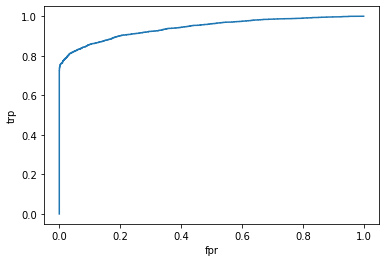

0.942350031376756

In [14]:
#xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.1)
fpr, tpr, threshold = roc_curve(ytrain,hypermodelu.predict(best_hp2l,model2l,xtrain).reshape(-1,1))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

125/125 [==============================] - 1s 4ms/step


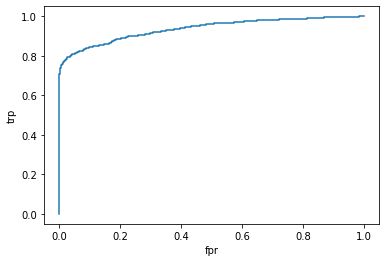

0.9363349340356747

In [15]:
fpr, tpr, threshold = roc_curve(testing.churn.values.reshape(-1,1),hypermodelu.predict(best_hp2l,model2l,testing.drop("churn",axis=1).values))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

187/187 [==============================] - 1s 4ms/step


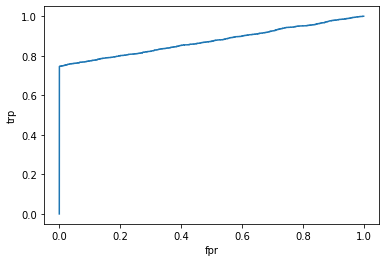

0.8751868510682588

In [ ]:
#xtrain,xval,ytrain,yval=train_test_split(training.drop('churn',axis=1).values,training.churn.values.reshape(-1,1),test_size=0.1)
fpr, tpr, threshold = roc_curve(ytrain,hypermodelu.predict(best_hp2l,model2l,xtrain).reshape(-1,1))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

125/125 [==============================] - 0s 2ms/step


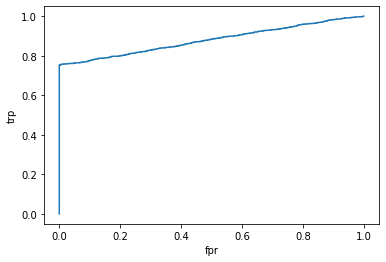

0.8797772891998632

In [ ]:
fpr, tpr, threshold = roc_curve(testing.churn.values.reshape(-1,1),hypermodelu.predict(best_hp2l,model2l,testing.drop("churn",axis=1).values))
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

299/299 [==============================] - 1s 2ms/step


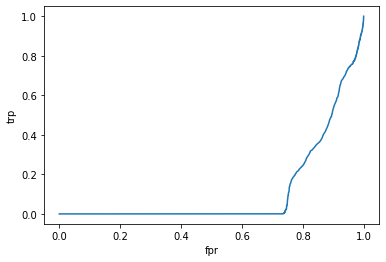

0.8799634172137567

In [ ]:
fpr, tpr, threshold = roc_curve(ytrain,hypermodelu.predict(best_hp2l,model2l,xtrain))
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)
#0.8711

125/125 [==============================] - 0s 2ms/step


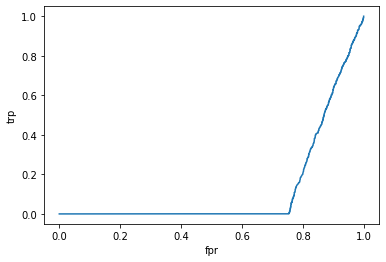

0.8712568603781391

In [ ]:
fpr, tpr, threshold = roc_curve(testing.churn.values.reshape(-1,1),hypermodelu.predict(best_hp2,model2,testing.drop("churn",axis=1).values))
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

370/370 [==============================] - 1s 2ms/step


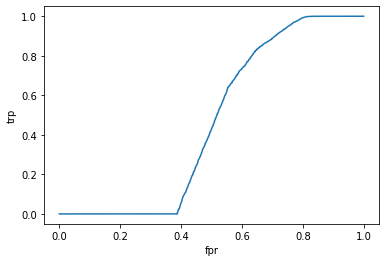

0.53819874759002

In [ ]:
fpr, tpr, threshold = roc_curve(ytrain,hypermodelu.predict(best_hp2,model2,xtrain))
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

125/125 [==============================] - 0s 2ms/step


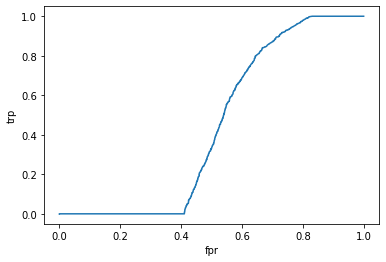

0.5590391749508373

In [ ]:
fpr, tpr, threshold = roc_curve(testing.churn.values.reshape(-1,1),hypermodelu.predict(best_hp2,model2,testing.drop("churn",axis=1).values))
plt.plot(tpr,fpr)
plt.xlabel('fpr')
plt.ylabel('trp')
plt.show()
auc(fpr,tpr)

In [ ]:
tun1.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 40
activation_1: relu
units_2: 40
activation_2: tanh
units_4: 22
activation_4: tanh
units_6: 28
activation_6: tanh
units_7: 36
activation_7: tanh
Score: 0.11228405684232712
Trial summary
Hyperparameters:
units_1: 32
activation_1: relu
units_2: 36
activation_2: relu
units_4: 14
activation_4: relu
units_6: 48
activation_6: tanh
units_7: 32
activation_7: tanh
Score: 0.1124117374420166
Trial summary
Hyperparameters:
units_1: 56
activation_1: relu
units_2: 32
activation_2: tanh
units_4: 10
activation_4: tanh
units_6: 32
activation_6: relu
units_7: 48
activation_7: tanh
Score: 0.11246307939291
Trial summary
Hyperparameters:
units_1: 36
activation_1: relu
units_2: 40
activation_2: tanh
units_4: 18
activation_4: relu
units_6: 28
activation_6: relu
units_7: 28
activation_7: relu
Score: 0.11313115060329437
Trial summary
Hyperparameters:
units_1: 32
activation_1: relu
units_2: 28
activatio

In [ ]:
tun1L.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 52
activation_1: relu
units_2: 32
activation_2: tanh
units_4: 18
activation_4: tanh
units_6: 32
activation_6: relu
units_7: 44
activation_7: relu
learning_rate: 0.0006929396347746626
Score: 0.1442972719669342
Trial summary
Hyperparameters:
units_1: 52
activation_1: relu
units_2: 48
activation_2: relu
units_4: 10
activation_4: relu
units_6: 36
activation_6: relu
units_7: 36
activation_7: tanh
learning_rate: 0.001187322060360933
Score: 0.1738615483045578
Trial summary
Hyperparameters:
units_1: 52
activation_1: relu
units_2: 28
activation_2: relu
units_4: 14
activation_4: relu
units_6: 44
activation_6: relu
units_7: 32
activation_7: relu
learning_rate: 0.0004247686756839466
Score: 0.17447614669799805
Trial summary
Hyperparameters:
units_1: 48
activation_1: relu
units_2: 48
activation_2: relu
units_4: 2
activation_4: relu
units_6: 32
activation_6: tanh
units_7: 32
activation_7: relu

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 40)                480       
                                                                 
 batch_normalization_7 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_7 (Dense)             (None, 44)                1804      
                                                                 
 batch_normalization_8 (Batc  (None, 44)               176       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 44)               

In [ ]:
loss_fn=keras.losses.MeanSquaredError()
optimizer=keras.optimizers.Adam(learning_rate=0.01)
train_acc_metric=keras.metrics.MeanSquaredError()
val_acc_metric=keras.metrics.MeanSquaredError()

@tf.function
def train_step(x,y):
    with tf.GradientTape() as tape:
        logits=model2(x,training=True)
        loss_value=loss_fn(y,logits)
    grads=tape.gradient(loss_value,model2.trainable_weights )
    train_acc_metric.update_state(y,logits)
    return loss_value
@tf.function
def test_step(x, y):
    val_logits = model2(x, training=False)
    val_acc_metric.update_state(y, val_logits)

In [ ]:
import time

epochs = 70
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    start_time = time.time()

    # Iterate over the batches of the dataset.
    for step, (x_batch_train,y_batch_train ) in enumerate(train_dataset):
        loss_value = train_step(x_batch_train, y_batch_train)

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %d samples" % ((step + 1) * batch_size))

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print("Training acc over epoch: %.4f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()


    for x_batch_val, y_batch_val in val_dataset:
        test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print("Validation acc: %.4f" % (float(val_acc),))
    print("Time taken: %.2fs" % (time.time() - start_time))



Start of epoch 0
Training loss (for one batch) at step 0: 0.3339
Seen so far: 164 samples
Training acc over epoch: 0.3163
Validation acc: 0.2866
Time taken: 4.49s

Start of epoch 1
Training loss (for one batch) at step 0: 0.2991
Seen so far: 164 samples
Training acc over epoch: 0.3175
Validation acc: 0.2862
Time taken: 0.24s

Start of epoch 2
Training loss (for one batch) at step 0: 0.3142
Seen so far: 164 samples
Training acc over epoch: 0.3177
Validation acc: 0.2853
Time taken: 0.24s

Start of epoch 3
Training loss (for one batch) at step 0: 0.2942
Seen so far: 164 samples
Training acc over epoch: 0.3152
Validation acc: 0.2860
Time taken: 0.31s

Start of epoch 4
Training loss (for one batch) at step 0: 0.3575
Seen so far: 164 samples
Training acc over epoch: 0.3179
Validation acc: 0.2860
Time taken: 0.31s

Start of epoch 5
Training loss (for one batch) at step 0: 0.3052
Seen so far: 164 samples
Training acc over epoch: 0.3207
Validation acc: 0.2855
Time taken: 0.31s

Start of epoch 

In [ ]:
training=training.drop("Unnamed: 0",axis=1)

In [ ]:
training.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.839783,0,0,2.0,0.0,0.436870,1,1,1,0.987657,0
1,-1.125050,0,1,3.0,0.0,-0.101940,1,0,0,-1.445631,1
2,1.034827,2,1,2.0,1.0,0.427989,1,1,0,0.443701,1
3,0.352225,1,0,1.0,0.0,0.225041,1,1,1,0.279804,1
4,-1.665020,1,0,1.0,1.0,0.342498,2,1,1,1.623358,0


In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11944 entries, 0 to 11943
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      11944 non-null  float64
 1   country           11944 non-null  int64  
 2   gender            11944 non-null  int64  
 3   age               11944 non-null  float64
 4   tenure            11944 non-null  float64
 5   balance           11944 non-null  float64
 6   products_number   11944 non-null  int64  
 7   credit_card       11944 non-null  int64  
 8   active_member     11944 non-null  int64  
 9   estimated_salary  11944 non-null  float64
 10  churn             11944 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.0 MB


In [ ]:
testing

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15802,0.718996,0,1,1.0,1.0,0.329709,1,1,0,-1.304275,1
1,2757,-2.082732,0,1,2.0,0.0,-1.328861,2,1,0,1.060191,1
2,820,0.107710,2,0,1.0,0.0,0.838503,2,1,0,-0.285781,0
3,8425,1.085768,0,0,1.0,1.0,0.584410,1,1,1,-1.372875,0
4,14670,-0.299814,1,1,1.0,0.0,1.538631,2,1,1,1.254064,1


In [ ]:
testing=testing.drop('Unnamed: 0',axis=1)